In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
sns.set_context('poster')
import glob
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance
import os

%load_ext autoreload
%autoreload 2

In [2]:
os.path.basename('../LCStudies/util/ml_util.py')

'ml_util.py'

In [10]:
path_prefix = '../LCStudies/'
import sys
sys.path.append(path_prefix)
from util import resolution_util as ru
from util import plot_util as pu
from util import ml_util as mu
import atlas_mpl_style as ampl
ampl.set_color_cycle('Oceanic',10)
# plt.style.use('paper')



Plotting pi0 using model False
Loading form ../graph_approach/scripts/results/gnBlock_20210613_pi0_concatFalse_ray*/


Plotting pi0 using model True
Loading form ../graph_approach/scripts/results/gnBlock_20210613_pi0_concatTrue_ray*/


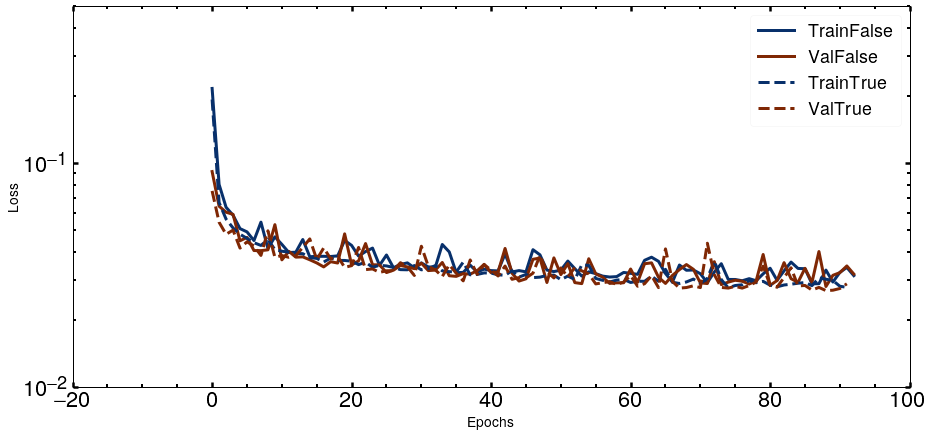



Plotting pion using model False
Loading form ../graph_approach/scripts/results/gnBlock_20210613_pion_concatFalse_ray*/


Plotting pion using model True
Loading form ../graph_approach/scripts/results/gnBlock_20210613_pion_concatTrue_ray*/


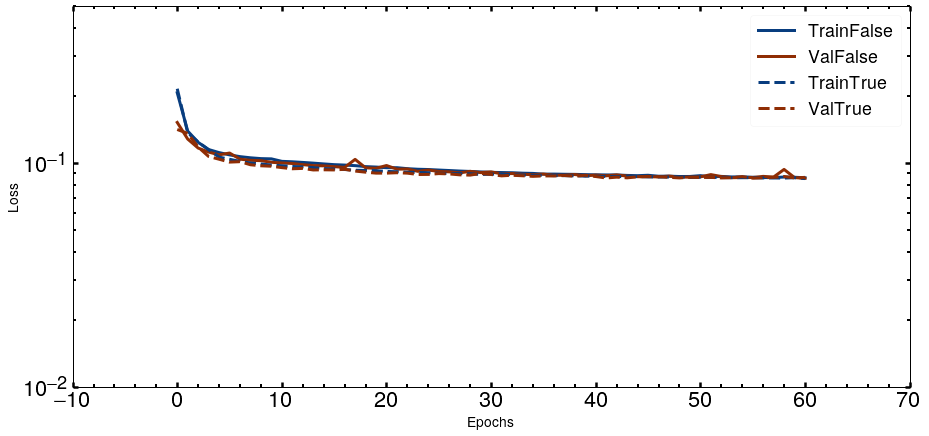

In [5]:
pion_list = ['pi0', 'pion']
sym_list = ['0', '+-',]
concat_type = ['False', 'True']
model_name = ['ConcatFalse', 'ConcatTrue']
line = ['-', '--']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

for i, pion in enumerate(pion_list):
    plt.figure(figsize=(15,7))
    for j, model in enumerate(concat_type):
        print('\n\nPlotting {} using model {}'.format(pion, model))
        data_dir = '../graph_approach/scripts/results/gnBlock_20210613_'+pion+'_concat'+model+'_ray*/'
        hist_files = np.sort(glob.glob(data_dir + 'losses.npz'))
        print('Loading form {}'.format(data_dir))
        
        
        hist = np.load(hist_files[0])
        plt.semilogy(hist['training'].mean(axis=1), color=blues[i, :3], 
                     label=r'$Train '+model+'$', linestyle=line[j])
        plt.semilogy(hist['validation'].mean(axis=1), color=oranges[i, :3], 
                     label=r'$Val '+model+'$', linestyle=line[j])
          

        plt.ylabel(r'$Loss$')
        plt.xlabel(r'$Epochs$')
        plt.ylim([1e-2, 5e-1])
        # sns.despine()
        plt.legend()
        # plt.savefig('results/training_mse.png', bbox_inches='tight', dpi=300)
    plt.show()




Plotting pi0 using model False
Loading form gnBlock_20210613_pi0_concatFalse_ray32
r2:0.999
PearsonR:1.000, SpearmanR:0.999, MSE:105.610, MAE:3.039
Saving figure to ../graph_approach/scripts/results/gnBlock_20210613_pi0_concatFalse_ray32/response_plot.png


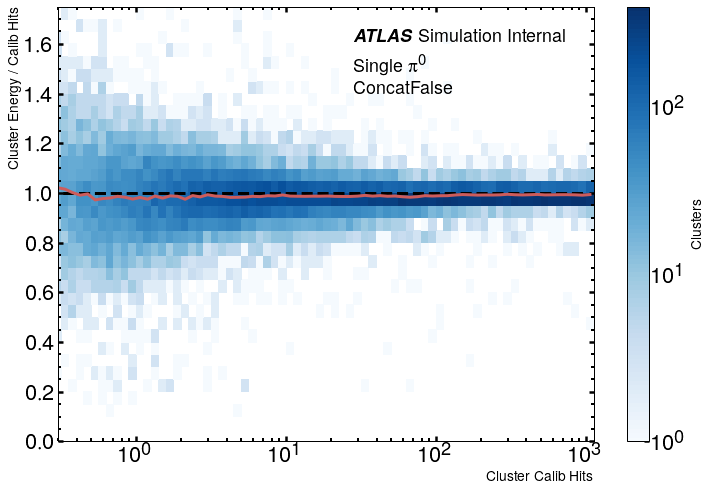



Plotting pi0 using model True
Loading form gnBlock_20210613_pi0_concatTrue_ray34
r2:0.999
PearsonR:1.000, SpearmanR:0.999, MSE:104.258, MAE:2.973
Saving figure to ../graph_approach/scripts/results/gnBlock_20210613_pi0_concatTrue_ray34/response_plot.png


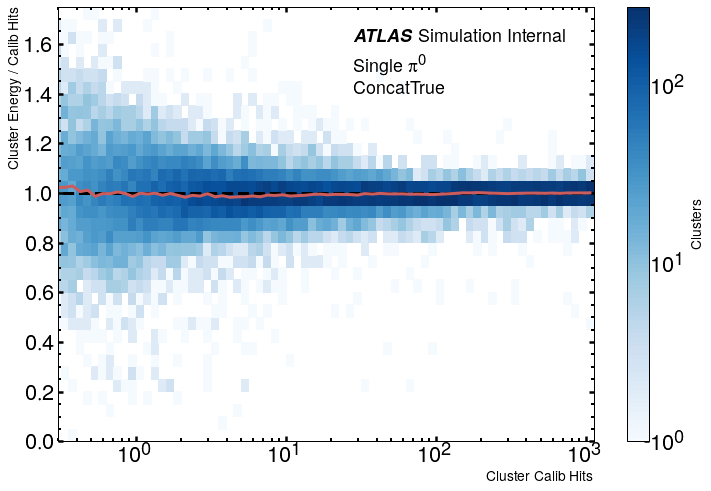



Plotting pion using model False
Loading form gnBlock_20210613_pion_concatFalse_ray31
r2:0.996
PearsonR:0.998, SpearmanR:0.991, MSE:269.500, MAE:4.437
Saving figure to ../graph_approach/scripts/results/gnBlock_20210613_pion_concatFalse_ray31/response_plot.png


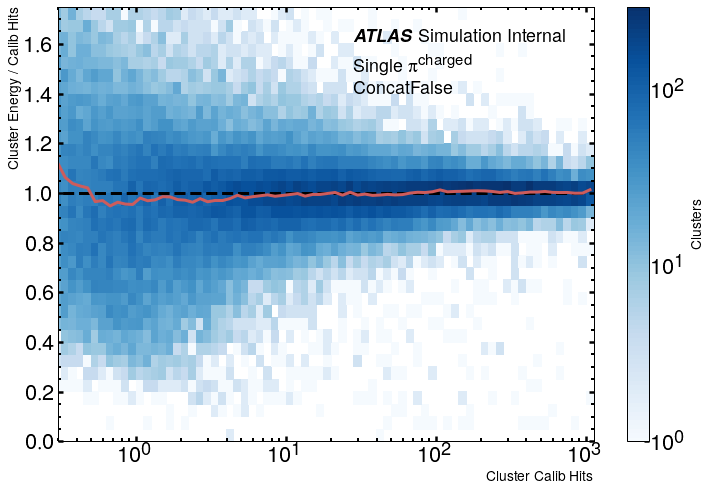



Plotting pion using model True
Loading form gnBlock_20210613_pion_concatTrue_ray41
r2:0.996
PearsonR:0.998, SpearmanR:0.992, MSE:270.240, MAE:4.423
Saving figure to ../graph_approach/scripts/results/gnBlock_20210613_pion_concatTrue_ray41/response_plot.png


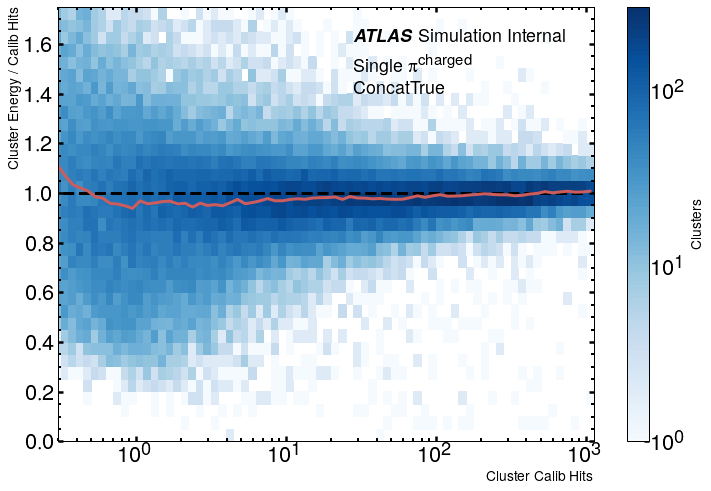

In [6]:
c_map = sns.color_palette("Blues")

pion_list = ['pi0', 'pion']
sym_list = ['0', 'charged',]
concat_type = ['False', 'True']
model_name = ['ConcatFalse', 'ConcatTrue']
line = ['-', '--']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

response_median = []

for i, pion in enumerate(pion_list):
    for j, model in enumerate(concat_type):
        print('\n\nPlotting {} using model {}'.format(pion, model))
        data_file = glob.glob('../graph_approach/scripts/results/gnBlock_20210613_'+pion+'_concat'+model+'_ray*/predictions.npz')[0]
        print('Loading form {}'.format(data_file.split('/')[-2]))
        mse_pred = np.load(data_file)
        y_true = mse_pred['targets']
        y_pred = mse_pred['outputs']
        y_ratio = y_pred/y_true

        p_r = pearsonr(y_true,y_pred)[0]
        s_r = spearmanr(y_true,y_pred)[0]
        mse = mean_squared_error(y_true,y_pred)
        mae = mean_absolute_error(y_true,y_pred)
        r2 = r2_score(y_true,y_pred)
        print("r2:{:.3f}".format(r2))
        print("PearsonR:{:.3f}, SpearmanR:{:.3f}, MSE:{:.3f}, MAE:{:.3f}".
              format(p_r, s_r, mse, mae))
        f_name = os.path.dirname(data_file)+'/response_plot.png'
        xcenter, medRegCNN = ru.responsePlot(y_true, y_ratio,
                                             figfile = f_name,
                                             statistic = 'median',
                                             atlas_x = 0.55, atlas_y = 0.95, simulation = True,
                                             textlist = [{'x': 0.55, 'y': 0.85, 'text': 'Single $\pi^{'+sym_list[i]+'}$'},
                                                         {'x': 0.55, 'y': 0.8,  'text': model_name[j]}])
        response_median.append(medRegCNN)

extra_line [[0, 10000.0], [1, 1]]


<Figure size 576x432 with 0 Axes>

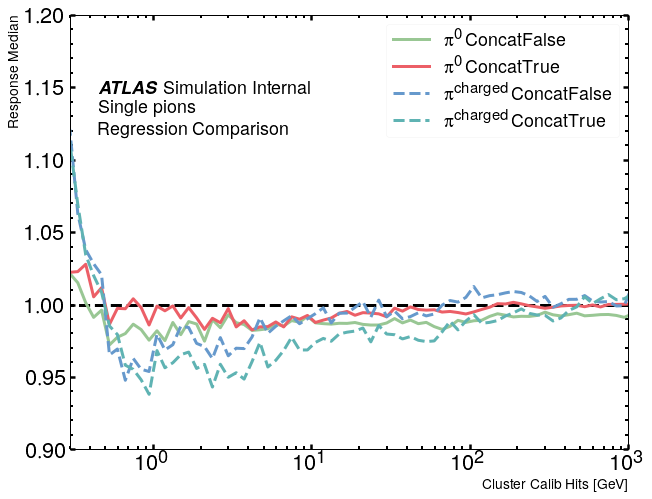

In [18]:
pu.lineOverlay(xcenter=xcenter, lines=response_median,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{0}\:ConcatFalse$', r'$\pi^{0}\:ConcatTrue$', 
                          r'$\pi^{charged}\:ConcatFalse$', r'$\pi^{charged}\:ConcatTrue$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response Median',
                figfile = '../graph_approach/scripts/results/medResponse_gnBlock.png',
                y_max=1.2, y_min=.9, x_min = .3, colorgrouping=0,
                extra_lines= [[[0, 10e3], [1, 1]]],
                linestyles = ['solid', 'solid', 'dashed', 'dashed',],
                atlas_x = 0.05, atlas_y = 0.85, simulation = True,
                textlist = [{'x': 0.05, 'y': 0.775, 'text': 'Single $pions$'},
                            {'x': 0.05, 'y': 0.725,  'text': 'Regression Comparison'}])

In [12]:
extra_lines= [[0, 10e3], [1, 1]],
for e in extra_lines:
    print(e[0])
    print(e[1])

[0, 10000.0]
[1, 1]




Plotting pi0 using model False
Loading form gnBlock_20210613_pi0_concatFalse_ray32
Wasserstein distance: 0.007


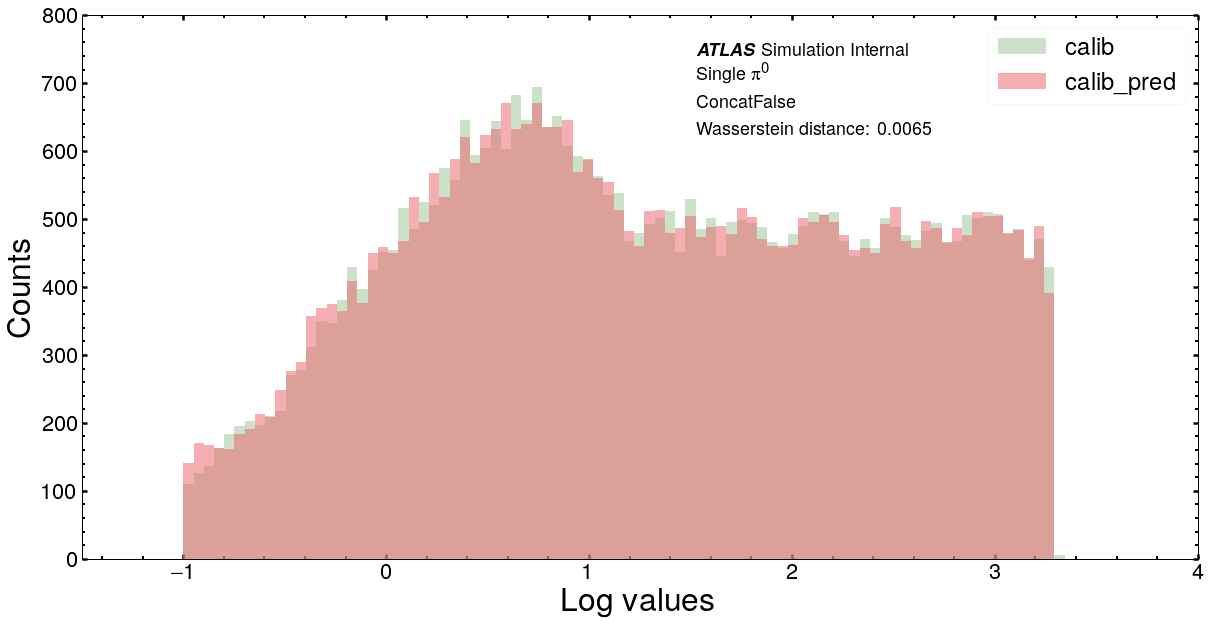



Plotting pi0 using model True
Loading form gnBlock_20210613_pi0_concatTrue_ray34
Wasserstein distance: 0.004


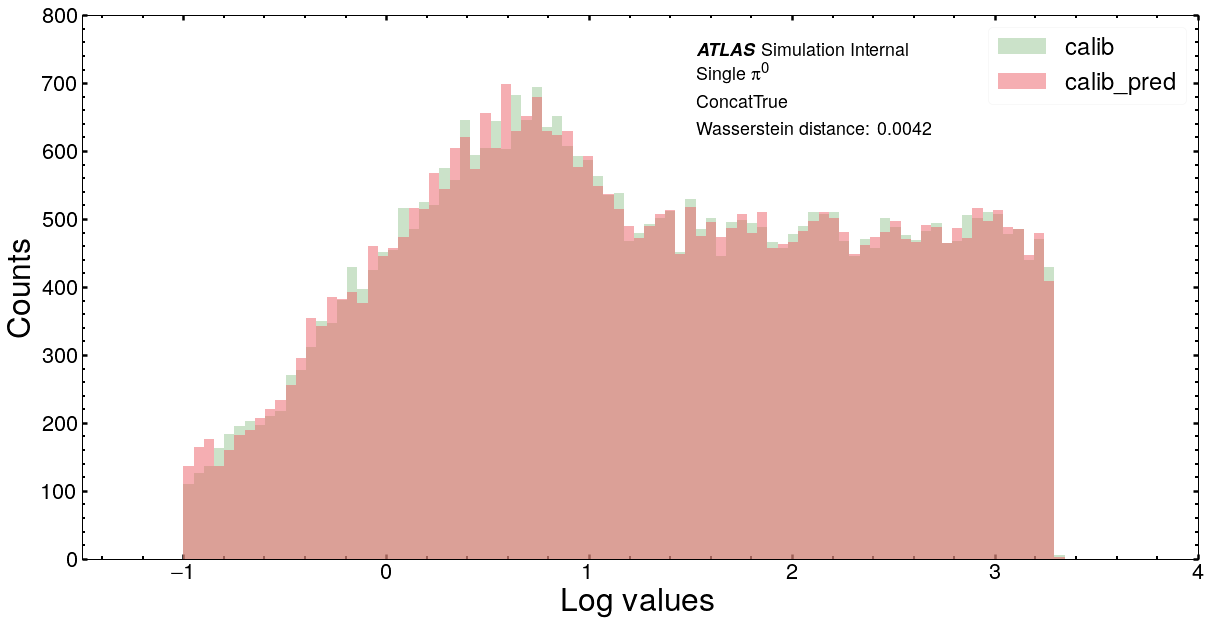



Plotting pion using model False
Loading form gnBlock_20210613_pion_concatFalse_ray31
Wasserstein distance: 0.017


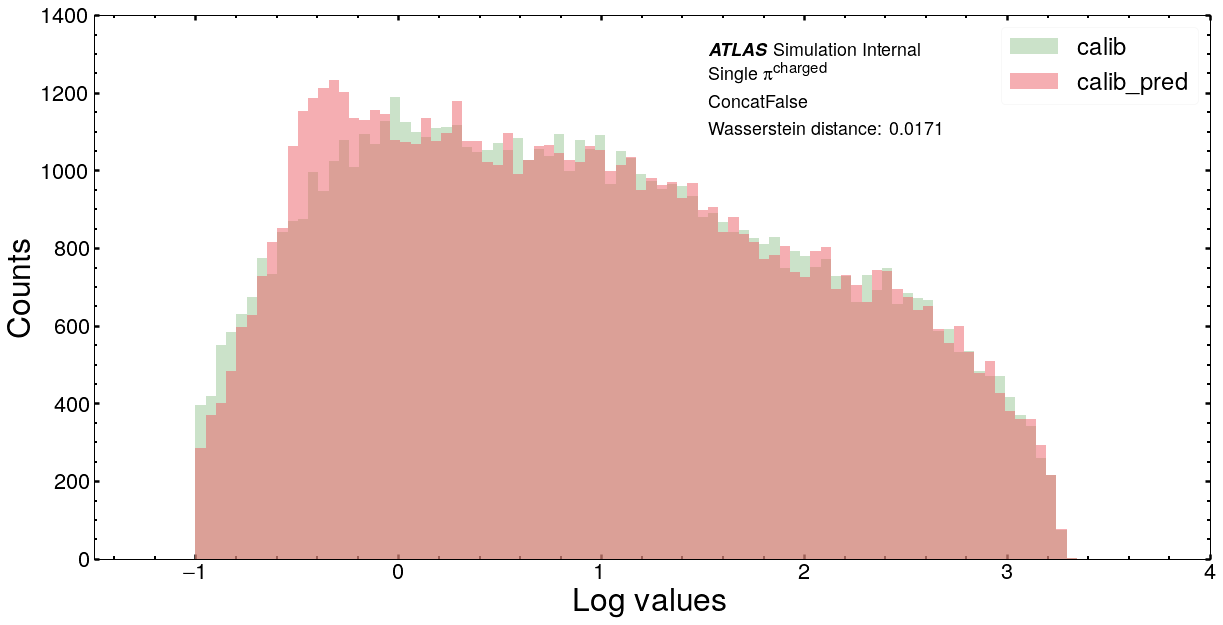



Plotting pion using model True
Loading form gnBlock_20210613_pion_concatTrue_ray41
Wasserstein distance: 0.023


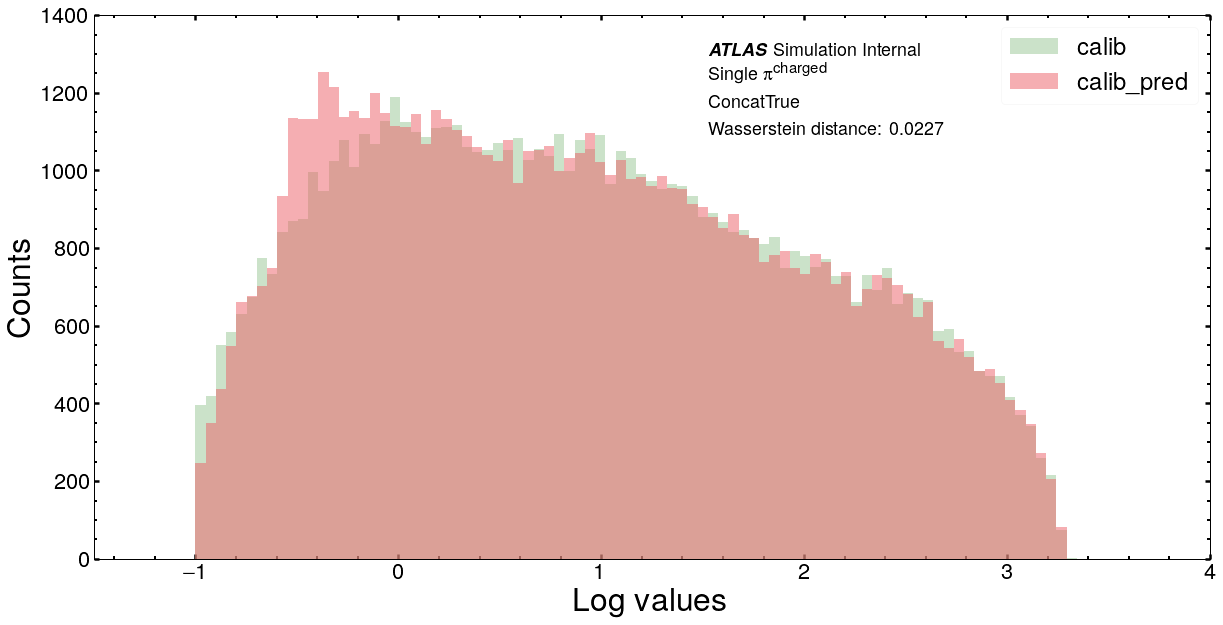

In [6]:
import atlas_mpl_style as ampl
ampl.use_atlas_style()

# set plotsytle choices here
params = {'legend.fontsize': 24,
          'axes.labelsize': 32}
plt.rcParams.update(params)

ampl.set_color_cycle('Oceanic',10)

c_map = sns.color_palette("Blues")

pion_list = ['pi0', 'pion']
sym_list = ['0', 'charged',]
concat_type = ['False', 'True']
model_name = ['ConcatFalse', 'ConcatTrue']
line = ['-', '--']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))


for i, pion in enumerate(pion_list):
    for j, model in enumerate(concat_type):
        print('\n\nPlotting {} using model {}'.format(pion, model))
        data_file = glob.glob('../graph_approach/scripts/results/gnBlock_20210613_'+pion+'_concat'+model+'_ray*/predictions.npz')[0]
        print('Loading form {}'.format(data_file.split('/')[-2]))
        mse_pred = np.load(data_file)
        y_true = np.log10(mse_pred['targets'])
        y_pred = np.log10(mse_pred['outputs'])
        print('Wasserstein distance: {:.3f}'.format(wasserstein_distance(y_true, y_pred)))
        fig = plt.figure(figsize=(20,10))
        plt.hist(y_true, bins=np.linspace(-1., 4., 100), alpha=.5, label=r'$calib$')
        plt.hist(y_pred, bins=np.linspace(-1., 4., 100), alpha=.5, label=r'$calib\_pred$')
        plt.legend(loc='upper right')
        plt.xlabel(r'$Log\ values$')
        plt.ylabel(r'$Counts$')
        plt.xlim([-1.5, 4.])

        atlas_x = 0.55 
        atlas_y = 0.95 
        simulation = True
        textlist = [{'x': 0.55, 'y': 0.88, 'text': 'Single $\pi^{'+sym_list[i]+'}$'},
                    {'x': 0.55, 'y': 0.83,  'text': model_name[j]},
                    {'x': 0.55, 'y': 0.78, 'text': 'Wasserstein distance: {:.4f}'.format(wasserstein_distance(y_true, y_pred))}]

        pu.drawLabels(fig, atlas_x, atlas_y, simulation, textlist)
        # sns.despine()
        f_name = os.path.dirname(data_file)+'/distribution_plot.png'        
        plt.savefig(f_name)
        plt.show()



Plotting pi0 using model False
Loading form gnBlock_20210613_pi0_concatFalse_ray32
(39384,) (39384,)


<Figure size 576x432 with 0 Axes>

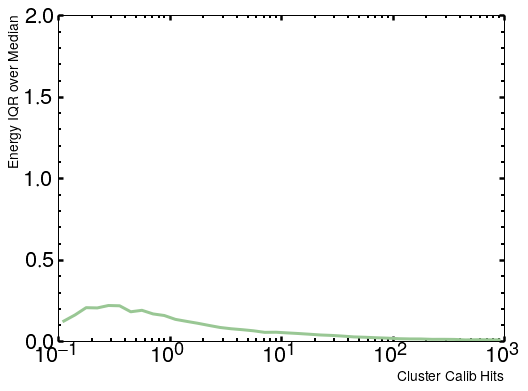



Plotting pi0 using model True
Loading form gnBlock_20210613_pi0_concatTrue_ray34
(39384,) (39384,)


<Figure size 576x432 with 0 Axes>

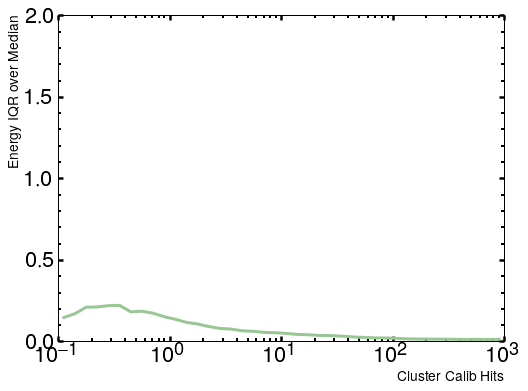



Plotting pion using model False
Loading form gnBlock_20210613_pion_concatFalse_ray31
(71939,) (71939,)


<Figure size 576x432 with 0 Axes>

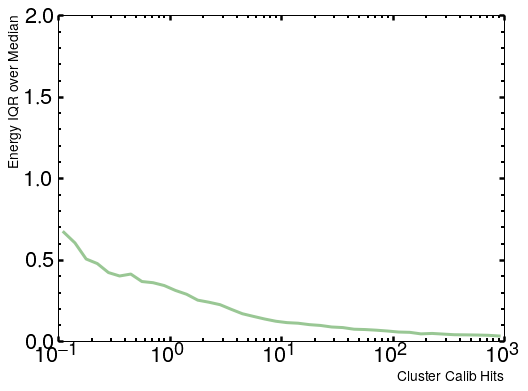



Plotting pion using model True
Loading form gnBlock_20210613_pion_concatTrue_ray41
(71939,) (71939,)


<Figure size 576x432 with 0 Axes>

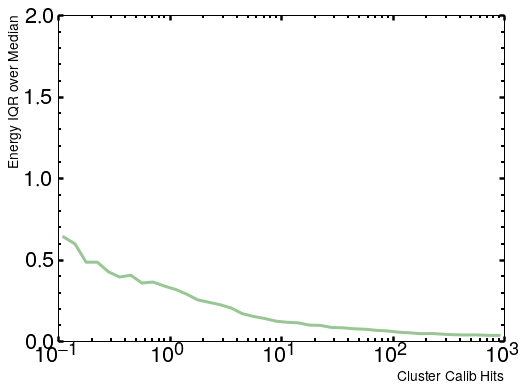

In [20]:
iqr = []
for i, pion in enumerate(pion_list):
    for j, model in enumerate(concat_type):
        print('\n\nPlotting {} using model {}'.format(pion, model))
        data_file = glob.glob('../graph_approach/scripts/results/gnBlock_20210613_'+pion+'_concat'+model+'_ray*/predictions.npz')[0]
        print('Loading form {}'.format(data_file.split('/')[-2]))
        mse_pred = np.load(data_file)
        y_true = mse_pred['targets']
        y_pred = mse_pred['outputs']
        y_ratio = y_pred/y_true
        print(y_true.shape, y_pred.shape)
        xcenter, iqr_curr= ru.resolutionPlot(y_true, y_ratio, statistic='iqrOverMed')
        iqr.append(iqr_curr)
        

<Figure size 576x432 with 0 Axes>

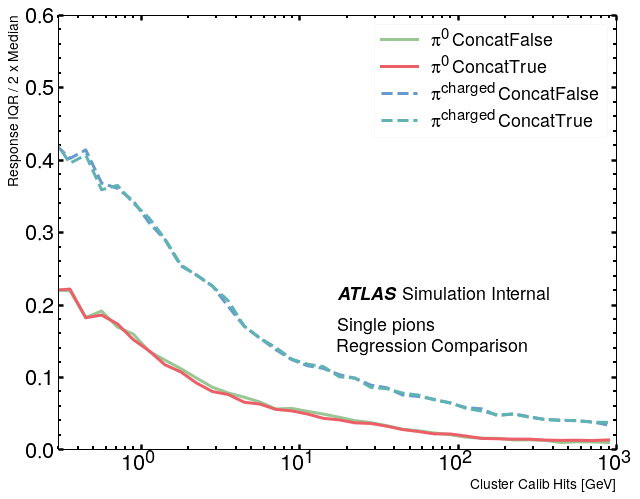

In [21]:
pu.lineOverlay(xcenter=xcenter, lines = iqr,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{0}\:ConcatFalse$', r'$\pi^{0}\:ConcatTrue$', 
                          r'$\pi^{charged}\:ConcatFalse$', r'$\pi^{charged}\:ConcatTrue$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response IQR / 2 x Median',
                figfile = '../graph_approach/scripts/results/iqr_gnBlock.png',
                y_max = .6, x_min = .3,
                linestyles = ['solid', 'solid', 'dashed', 'dashed',],
                atlas_x = 0.5, atlas_y = 0.375, simulation = True,
                textlist = [{'x': 0.5, 'y': 0.275, 'text': 'Single $pions$'},
                            {'x': 0.5, 'y': 0.225,  'text': 'Regression Comparison'}])

In [9]:
y_true.shape, y_pred.shape

((71939,), (71939,))